# Sujet 6 : Autour du Paradoxe de Simpson

## Contexte :

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

## L'étude de ce sujet se fera en 3 étapes :

1. Représenter dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculer dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Analyser ce résultat.

2. Reprendre la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera les classes suivantes : 18-34 ans, 35-54 ans, 55-64 ans, plus de 65 ans. Analyser le résultat.

3. Etablir une régression logistique en introduisant un variable Death valant 1 ou 0 si la personne est morte ou pas au cours des 20 années entre les 2 sondages. Conclure.

## Etape 1 : Calcul du taux de mortalité pour les fumeuses et les non fumeuses

Tout d'abord, il faut commencer par inclure les bibliothèques dont nous aurons besoin.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np


Il faut ensuite charger et lire le fichier

In [2]:
data_file = "Subject6_smoking.csv"

In [3]:
raw_data = pd.read_csv(data_file)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

 Création de 2 "tableaux" à partir du contenu du fichier csv :
        *nonFumeuses* contient les données des personnes qui ne fument pas (qui ont "No" dans la colonne "Smoker")
        et *fumeuses* contient les données des personnes qui fument (qui ont "Yes" dans la colonne "Smoker")

In [4]:
#trier = raw_data.sort_values(by = ["Smoker"])
masq = raw_data["Smoker"] == "Yes"
fumeuses = raw_data.loc[masq]
nonFumeuses = raw_data.loc[raw_data["Smoker"]=="No"]



In [5]:
#Affichage
fumeuses

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
4       Yes  Alive  81.4
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
12      Yes  Alive  49.2
19      Yes  Alive  65.7
21      Yes  Alive  38.3
23      Yes   Dead  62.3
26      Yes  Alive  59.2
30      Yes  Alive  34.6
31      Yes  Alive  51.9
32      Yes  Alive  49.9
35      Yes  Alive  46.7
36      Yes  Alive  44.4
37      Yes  Alive  29.5
38      Yes   Dead  33.0
39      Yes  Alive  35.6
40      Yes  Alive  39.1
42      Yes  Alive  35.7
46      Yes   Dead  44.3
48      Yes  Alive  37.5
49      Yes  Alive  22.1
53      Yes  Alive  39.0
56      Yes  Alive  40.1
60      Yes  Alive  58.1
61      Yes  Alive  37.3
63      Yes   Dead  36.3
...     ...    ...   ...
1240    Yes  Alive  29.7
1243    Yes  Alive  40.1
1251    Yes  Alive  27.8
1252    Yes  Alive  52.4
1253    Yes  Alive  27.8
1254    Yes  Alive  41.0
1259    Yes  Alive  40.8
1260    Yes  Alive  20.4
1263    Yes  Alive  20.9
1264    Yes  Alive  45.5
1269    Yes  Alive  38.8
1270    Yes  Alive  55.5
1271    Yes  Alive  24.9
1273    Yes  Alive  55.7
1276    Yes  Alive  58.5
1278    Yes  Alive  43.7
1282    Yes  Alive  51.2
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1288    Yes   Dead  39.3
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1299    Yes   Dead  60.0
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1307    Yes  Alive  43.0
1309    Yes  Alive  35.9
1311    Yes   Dead  62.1

[582 rows x 3 columns]

In [6]:
#Affichage
nonFumeuses

Smoker Status   Age
2        No   Dead  57.5
3        No  Alive  47.1
5        No  Alive  36.8
6        No  Alive  23.8
11       No   Dead  66.0
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
20       No   Dead  73.2
22       No  Alive  33.4
24       No  Alive  18.0
25       No  Alive  56.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
33       No  Alive  19.4
34       No  Alive  56.9
41       No   Dead  69.7
43       No   Dead  75.8
44       No  Alive  25.3
45       No   Dead  83.0
47       No  Alive  18.5
50       No  Alive  82.8
51       No  Alive  45.0
52       No   Dead  73.3
54       No  Alive  28.4
55       No   Dead  73.7
...     ...    ...   ...
1262     No  Alive  41.2
1265     No  Alive  26.7
1266     No  Alive  41.8
1267     No  Alive  33.7
1268     No  Alive  56.5
1272     No  Alive  33.0
1274     No  Alive  25.7
1275     No  Alive  19.5
1277     No  Alive  23.4
1279     No  Alive  34.4
1280     No   Dead  83.9
1281     No  Alive  34.9
1283     No   Dead  86.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1298     No  Alive  39.7
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1306     No   Dead  61.4
1308     No  Alive  42.1
1310     No  Alive  22.3
1312     No   Dead  88.6
1313     No  Alive  39.1

[732 rows x 3 columns]

Calcul du nombre **total** de fumeuses (*nbTotalF*) et de non fumeuses (*nbTotalNF*)

In [7]:
nbTotalF = len(fumeuses.axes[0])
nbTotalNF = len(nonFumeuses.axes[0])
print("Le nombre total de fumeuses est de :", nbTotalF)
print("Le nombre total de non fumeuses est de :", nbTotalNF)

Le nombre total de fumeuses est de : 582
Le nombre total de non fumeuses est de : 732


Calcul du nombre de **fumeuses décédées** (*nbDecedeesF*)

In [8]:
nbDecedeesF = len(fumeuses.loc[fumeuses["Status"]=="Dead"])
nbDecedeesF

139

Calcul du nombre de **non fumeuses décédées** (*nbDecedeesNF*)

In [9]:
nbDecedeesNF = len(nonFumeuses.loc[nonFumeuses["Status"]=="Dead"])
nbDecedeesNF

230

Calcul du **taux de mortalité** des fumeuses (*tauxMortF*) et des non fumeuses (*tauxMortNF*)

In [10]:
tauxMortF = nbDecedeesF/nbTotalF*100
tauxMortNF = nbDecedeesNF/nbTotalNF*100
print("Sur la période donnée, il y a pour les fumeuses un taux de mortalité de : ", tauxMortF, "%")
print("et il y a pour les non fumeuses un taux de mortalité de : ", tauxMortNF, "%")

Sur la période donnée, il y a pour les fumeuses un taux de mortalité de :  23.883161512027492 %
et il y a pour les non fumeuses un taux de mortalité de :  31.420765027322407 %


Création d'une nouvelle DataFrame pandas (*dt*) qui contient les taux de mortalité selon le statut (fumeuse ou non) en vue de la construction d'un graphique utilisant ces données.

In [11]:
d = {"tauxMortalite" : [tauxMortF, tauxMortNF], "Statut" : ["Fumeuses", "nonFumeuses"]}
dt = pd.DataFrame(data = d)
dt

Statut  tauxMortalite
0     Fumeuses      23.883162
1  nonFumeuses      31.420765

Création d'un diagramme en barre pour illustrer les calculs précédents.

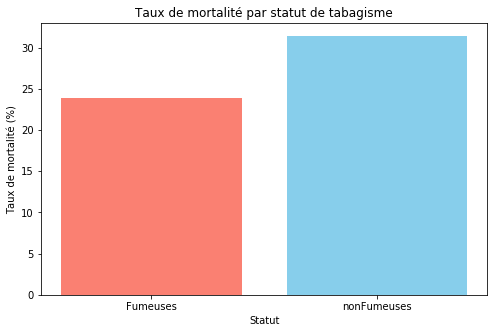

In [12]:
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.bar(dt["Statut"], dt["tauxMortalite"], color=['salmon', 'skyblue'])

plt.title("Taux de mortalité par statut de tabagisme")
plt.xlabel("Statut")
plt.ylabel("Taux de mortalité (%)")

plt.show()


On obtient des résultats assez surprenants dans le sens où, étant donné que l'on nous a souvent répété que fumer est mauvais pour la santé, nous nous attendions à retrouver ce fait dans cette étude.
Or, nous pouvons observer que le résultat des calculs effectués nous montre l'inverse de ce à quoi nous nous attendions : le groupe de femmes qui ne fumaient pas a un taux de mortalité supérieur à celui composé de femmes qui fumaient.

## Etape 2 : Calcul du taux de mortalité pour les fumeuses et les non fumeuses selon des classes d'âge

Première tentative pour calculer le nombre total de fumeuses et de non fumeuses ayant entre 18 et 34 ans

In [13]:
nb18_34F = len(fumeuses.loc[fumeuses["Age"]<34]) - len(fumeuses.loc[fumeuses["Age"]<18])
nb18_34NF = len(nonFumeuses.loc[nonFumeuses["Age"]<34]) - len(nonFumeuses.loc[nonFumeuses["Age"]<18])
print(nb18_34F, nb18_34NF)

179 219


Calcul avec une autre méthode du nombre de fumeuses entre 18 et 34 ans et calcul du nombre de fumeuses de appartenant à cet intervalle d'âge qui sont mortes.

In [14]:
test = fumeuses.loc[fumeuses["Age"]<34]
t2 = test.loc[test["Age"]>=18]
print(len(t2))
nbDecedees18_34F = len(t2.loc[t2["Status"]=="Dead"])
print(nbDecedees18_34F, "fumeuses ayant entre 18 et 34 ans lors du premier sondage sont décédées durant la période avant la suite de l'étude")

179
5 fumeuses ayant entre 18 et 34 ans lors du premier sondage sont décédées durant la période avant la suite de l'étude


Calcul du taux de mortalité pour les fumeuses entre 18 et 34 ans.

In [15]:
tauxMort18_34F = nbDecedees18_34F/nb18_34F*100
tauxMort18_34F

2.793296089385475

Une fois les calculs trouvés et testés sur le premier intervalle d'âge \[18, 34[ , il vaut mieux créer une fonction qui calcule le taux de mortalité pour un intervalle et une DataFrame donnés.

In [16]:
def calculTMparClAge(borneInf, borneSup, data): # la borne supérieure de l'intervalle n'est pas comprise :
    t1 = data.loc[data["Age"]<borneSup]         # [borneInf, borneSup[
    t2 = t1.loc[t1["Age"]>=borneInf]
    nb = len(t2)
    #print(nb)
    nbMort = len(t2.loc[t2["Status"]=="Dead"])
    #print(nbMort)
    tauxM = nbMort/nb*100
    return tauxM
    
    

In [17]:
tauxMort18_34Fv2 = calculTMparClAge(18, 34, fumeuses)
print("Le taux de mortalité des fumeuses pour la classe d'âge 18-34 est de :",  tauxMort18_34Fv2, "%")

tauxMort18_34NF = calculTMparClAge(18, 34, nonFumeuses)
print("Le taux de mortalité des non fumeuses pour la classe d'âge 18-34 est de :", tauxMort18_34NF)

Le taux de mortalité des fumeuses pour la classe d'âge 18-34 est de : 2.793296089385475 %
Le taux de mortalité des non fumeuses pour la classe d'âge 18-34 est de : 2.73972602739726


In [18]:
tauxMort34_54F = calculTMparClAge(34, 54, fumeuses)
print("Le taux de mortalité des fumeuses pour la classe d'âge 34-54 est de :",  tauxMort34_54F, "%")

tauxMort34_54NF =  calculTMparClAge(34, 54, nonFumeuses)
print("Le taux de mortalité des non fumeuses pour la classe d'âge 34-54 est de :",  tauxMort34_54NF, "%")

Le taux de mortalité des fumeuses pour la classe d'âge 34-54 est de : 17.154811715481173 %
Le taux de mortalité des non fumeuses pour la classe d'âge 34-54 est de : 9.547738693467336 %


In [19]:
tauxMort54_64F = calculTMparClAge(54, 64, fumeuses)
print("Le taux de mortalité des fumeuses pour la classe d'âge 54-64 est de :", tauxMort54_64F, "%")

tauxMort54_64NF =  calculTMparClAge(54, 64, nonFumeuses)
print("Le taux de mortalité des non fumeuses pour la classe d'âge 54-64 est de :", tauxMort54_64NF, "%")

Le taux de mortalité des fumeuses pour la classe d'âge 54-64 est de : 44.34782608695652 %
Le taux de mortalité des non fumeuses pour la classe d'âge 54-64 est de : 32.773109243697476 %


In [20]:
tauxMort64_150F = calculTMparClAge(64, 150, fumeuses)
print("Le taux de mortalité des fumeuses de la classe d'âge 64-150 est de :", tauxMort64_150F)

tauxMort64_150NF = calculTMparClAge(64, 150, nonFumeuses)
print("Le taux de mortalité des fumeuses de la classe d'âge 64-150 est de :", tauxMort64_150NF)

Le taux de mortalité des fumeuses de la classe d'âge 64-150 est de : 85.71428571428571
Le taux de mortalité des fumeuses de la classe d'âge 64-150 est de : 85.12820512820512


In [21]:
d2 = {"classeAge" : ["18-34F", "18-34NF", "34-54F", "34-54NF", "54-64F", "54-64NF", "64+F", "64+NF"],
      "tauxMortalite" : [tauxMort18_34Fv2, tauxMort18_34NF, tauxMort34_54F, tauxMort34_54NF, tauxMort54_64F, tauxMort54_64NF, tauxMort64_150F, tauxMort64_150NF]}
dt2 = pd.DataFrame(data = d2)

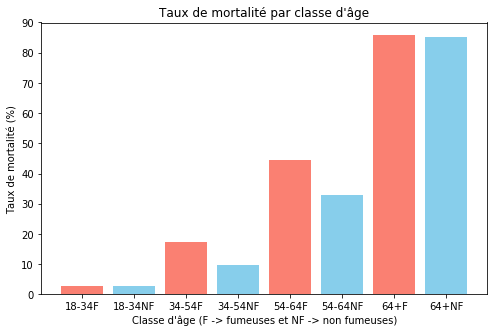

In [22]:
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.bar(dt2["classeAge"], dt2["tauxMortalite"], color=['salmon', 'skyblue'])

plt.title("Taux de mortalité par classe d'âge")
plt.xlabel("Classe d'âge (F -> fumeuses et NF -> non fumeuses)")
plt.ylabel("Taux de mortalité (%)")

plt.show()


En faisant des classes d'âge, nous obtenons pour les classes centrales comme 34-54 et 54-64 un résultat totalement opposé  à celui de l'étape précédente. Il y a, pour ces 2 classes, significativement plus de morts dans le groupe des fumeuses que dans le groupe de non fumeuses durant la période de temps entre le premier sondage et la suite de l'étude. Ce qui se rapproche plus de ce que nous aurions pu supposer avec seulement nos connaissances.
Nous pouvons donc avancer que l'âge des femmes est une variable non négligeable dans cette étude puisqu'en le prenant en compte, nous obtenons des résultats différents.
Ce qui entrerait en accord avec la description du [paradoxe de simpson](https://fr.wikipedia.org/wiki/Paradoxe_de_Simpson).

## Etape 3 : Régression logistique

Ajout d'une colonne Death contenant 1 si la personne est morte pendant la période entre le premier sondage et la suite de l'étude.

In [23]:
raw_data["Death"] = raw_data["Status"].apply(lambda x: 1 if x == "Dead" else 0) #Usage d'apply pour appliquer la fonction
raw_data                                                                        #anonyme lambda sur chaque ligne de la DataFrame

Smoker Status   Age  Death
0       Yes  Alive  21.0      0
1       Yes  Alive  19.3      0
2        No   Dead  57.5      1
3        No  Alive  47.1      0
4       Yes  Alive  81.4      0
5        No  Alive  36.8      0
6        No  Alive  23.8      0
7       Yes   Dead  57.5      1
8       Yes  Alive  24.8      0
9       Yes  Alive  49.5      0
10      Yes  Alive  30.0      0
11       No   Dead  66.0      1
12      Yes  Alive  49.2      0
13       No  Alive  58.4      0
14       No   Dead  60.6      1
15       No  Alive  25.1      0
16       No  Alive  43.5      0
17       No  Alive  27.1      0
18       No  Alive  58.3      0
19      Yes  Alive  65.7      0
20       No   Dead  73.2      1
21      Yes  Alive  38.3      0
22       No  Alive  33.4      0
23      Yes   Dead  62.3      1
24       No  Alive  18.0      0
25       No  Alive  56.2      0
26      Yes  Alive  59.2      0
27       No  Alive  25.8      0
28       No   Dead  36.9      1
29       No  Alive  20.2      0
...     ...    ...   ...    ...
1284    Yes   Dead  36.0      1
1285    Yes  Alive  48.3      0
1286     No  Alive  63.1      0
1287     No  Alive  60.8      0
1288    Yes   Dead  39.3      1
1289     No  Alive  36.7      0
1290     No  Alive  63.8      0
1291     No   Dead  71.3      1
1292     No  Alive  57.7      0
1293     No  Alive  63.2      0
1294     No  Alive  46.6      0
1295    Yes   Dead  82.4      1
1296    Yes  Alive  38.3      0
1297    Yes  Alive  32.7      0
1298     No  Alive  39.7      0
1299    Yes   Dead  60.0      1
1300     No   Dead  71.0      1
1301     No  Alive  20.5      0
1302     No  Alive  44.4      0
1303    Yes  Alive  31.2      0
1304    Yes  Alive  47.8      0
1305    Yes  Alive  60.9      0
1306     No   Dead  61.4      1
1307    Yes  Alive  43.0      0
1308     No  Alive  42.1      0
1309    Yes  Alive  35.9      0
1310     No  Alive  22.3      0
1311    Yes   Dead  62.1      1
1312     No   Dead  88.6      1
1313     No  Alive  39.1      0

[1314 rows x 4 columns]

Création de nouveaux DataFrame contenant les mêmes valeurs que *fumeuses* et *nonFumeuses*

In [26]:
nonFumeusesv2 = raw_data.loc[raw_data["Smoker"]=="No"]
fumeusesv2 = raw_data.loc[raw_data["Smoker"]=="Yes"]

Régression logistique sur le groupe des fumeuses

In [27]:
# Modèle pour les fumeuses
X_fumeuses = sm.add_constant(fumeusesv2['Age'])  # Ajout de l'intercept
y_fumeuses = fumeusesv2['Death']
model_fumeuses = sm.Logit(y_fumeuses, X_fumeuses).fit()

# Affichage du résumé des résultats
print("Fumeuses:\n", model_fumeuses.summary())

Optimization terminated successfully.
         Current function value: 0.412727
         Iterations 7
Fumeuses:
                            Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                  582
Model:                          Logit   Df Residuals:                      580
Method:                           MLE   Df Model:                            1
Date:                Wed, 30 Oct 2024   Pseudo R-squ.:                  0.2492
Time:                        18:10:51   Log-Likelihood:                -240.21
converged:                       True   LL-Null:                       -319.94
                                        LLR p-value:                 1.477e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5081      0.466    -11.814      0.000      -6.422      -4.594
Age            0.0

Régression logistique pour le groupe des non fumeuses

In [28]:
# Modèle pour les non-fumeuses
X_non_fumeuses = sm.add_constant(nonFumeusesv2['Age'])  # Ajout de l'intercept
y_non_fumeuses = nonFumeusesv2['Death']
model_non_fumeuses = sm.Logit(y_non_fumeuses, X_non_fumeuses).fit()

# Affichage du résumé des résultats
print("Non-fumeuses:\n", model_non_fumeuses.summary())

Optimization terminated successfully.
         Current function value: 0.354560
         Iterations 7
Non-fumeuses:
                            Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                  732
Model:                          Logit   Df Residuals:                      730
Method:                           MLE   Df Model:                            1
Date:                Wed, 30 Oct 2024   Pseudo R-squ.:                  0.4304
Time:                        18:12:25   Log-Likelihood:                -259.54
converged:                       True   LL-Null:                       -455.62
                                        LLR p-value:                 2.808e-87
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7955      0.479    -14.174      0.000      -7.735      -5.856
Age           

Création d'une série de valeurs d'âge régulièrement espacées allant de la plus petite à la plus grande avec 100 points intermédiaires.

In [29]:
age_range = np.linspace(raw_data['Age'].min(), raw_data['Age'].max(), 100)

In [30]:
# Prédictions pour les fumeuses
pred_fumeuses = model_fumeuses.predict(sm.add_constant(age_range))

# Prédictions pour les non-fumeuses
pred_non_fumeuses = model_non_fumeuses.predict(sm.add_constant(age_range))

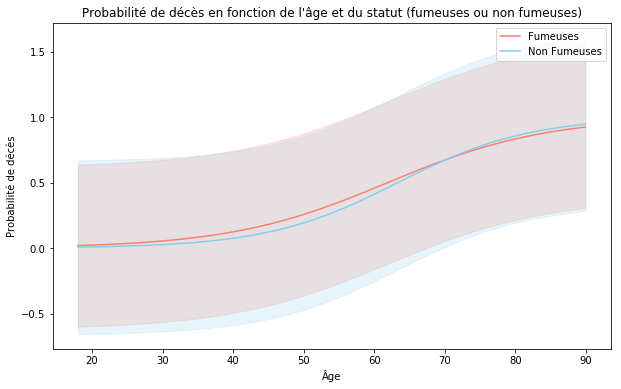

In [32]:
# Graphique de probabilité de décès en fonction de l'âge
plt.figure(figsize=(10, 6))
plt.plot(age_range, pred_fumeuses, label="Fumeuses", color="salmon")
plt.plot(age_range, pred_non_fumeuses, label="Non Fumeuses", color="skyblue")

# Ajout d'intervalles de confiance pour chaque groupe
plt.fill_between(age_range, pred_fumeuses - 1.96 * np.std(pred_fumeuses), pred_fumeuses + 1.96 * np.std(pred_fumeuses), color="salmon", alpha=0.2)
plt.fill_between(age_range, pred_non_fumeuses - 1.96 * np.std(pred_non_fumeuses), pred_non_fumeuses + 1.96 * np.std(pred_non_fumeuses), color="skyblue", alpha=0.2)

# Mise en forme du graphique
plt.xlabel("Âge")
plt.ylabel("Probabilité de décès")
plt.title("Probabilité de décès en fonction de l'âge et du statut (fumeuses ou non fumeuses)")
plt.legend()
plt.show()